In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
house_sales = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/house_sales_data.csv')
house_sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
house_sales.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### Data Manipulation

In [4]:
house_sales.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Assumptions
    * Target (price) must be normally Distributed

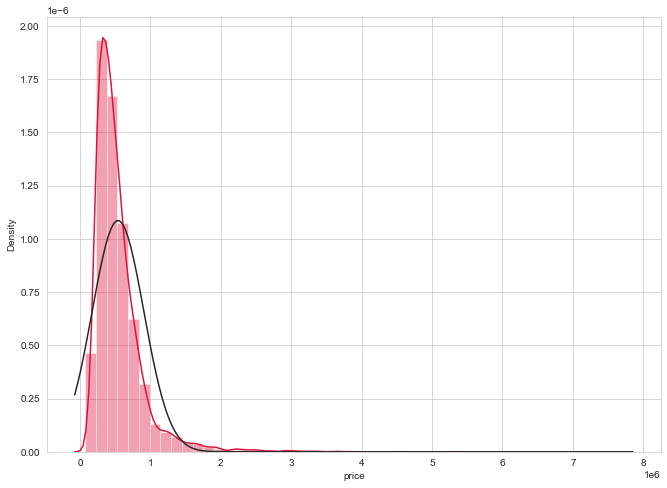

In [5]:
from scipy.stats import norm
sns.set_style('whitegrid')
plt.figure(figsize = (11,8))
sns.distplot(house_sales['price'], fit = norm, color = 'crimson')
plt.show()

<AxesSubplot:xlabel='price'>

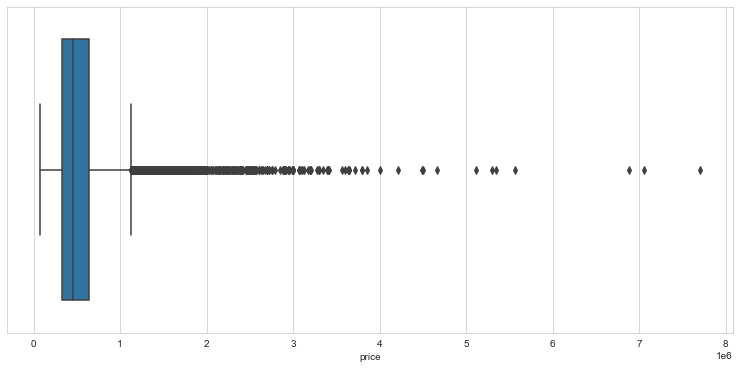

In [6]:
# Is there any outliers ?
sns.set_style('whitegrid')
plt.figure(figsize = (13,6))
sns.boxplot('price', data = house_sales)

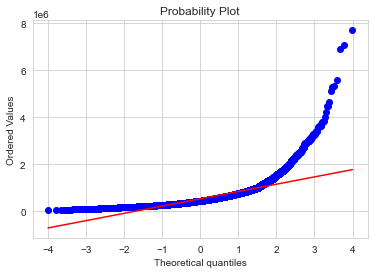

In [7]:
from scipy import stats
sns.set_style('whitegrid')
fig = plt.figure()
res = stats.probplot(house_sales['price'], plot = plt)

#### Handling Outliers by Z-score

In [8]:
house_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
house_df = house_sales.drop(['id','date'], axis = 1)

In [10]:
from scipy import stats
z = stats.zscore(house_df)

In [11]:
np.where(np.abs(stats.zscore(house_df)) > 4)

(array([    1,     5,    21, ..., 21576, 21576, 21576], dtype=int64),
 array([13, 17,  7, ...,  0,  6,  7], dtype=int64))

In [12]:
# % of overall data that we are lossing 
len(np.where(np.abs(stats.zscore(house_df)) > 4)[0]) / len(house_df)

0.11696664044787859

In [13]:
house_df.drop(np.where(np.abs(stats.zscore(house_df)) > 4)[0], axis = 0, inplace = True)

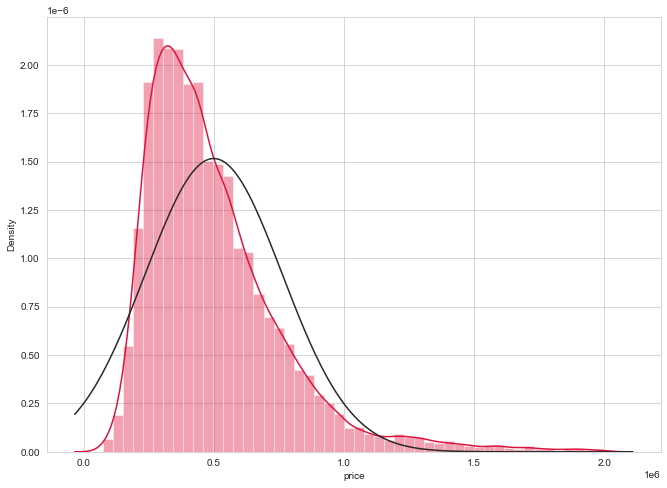

In [14]:
from scipy.stats import norm
sns.set_style('whitegrid')
plt.figure(figsize = (11,8))
sns.distplot(house_df['price'], fit = norm, color = 'crimson')
plt.show()

#### Correlation

<AxesSubplot:>

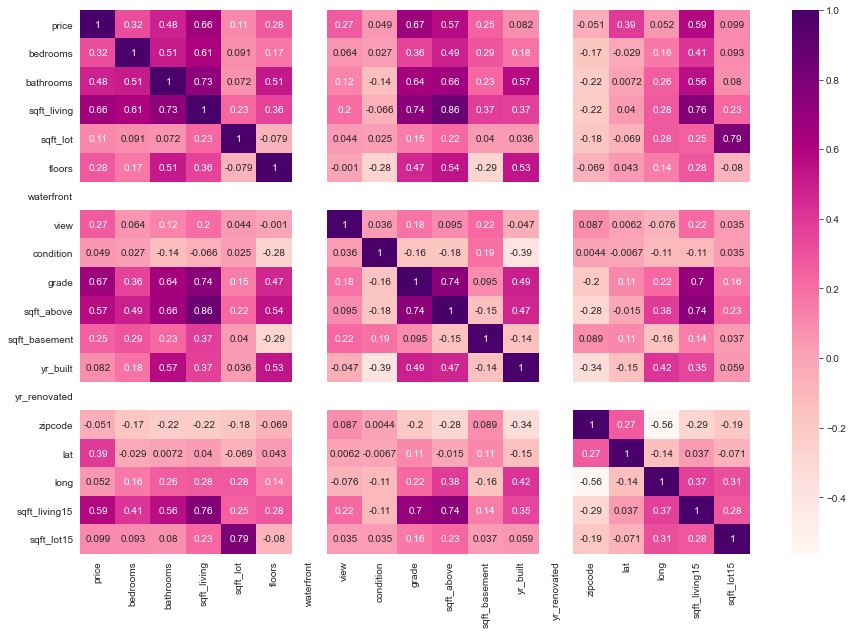

In [15]:
plt.figure(figsize = (15,10))
sns.heatmap(house_df.corr(), annot = True, cmap = 'RdPu')

<AxesSubplot:>

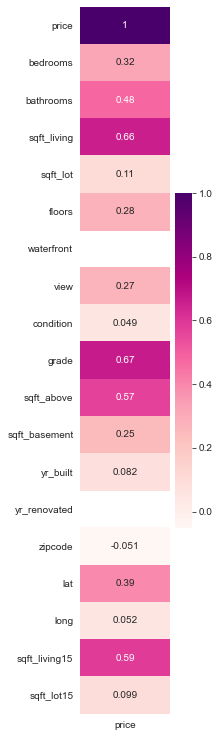

In [16]:
plt.figure(figsize = (2,13))
sns.heatmap(house_df.corr()[['price']], annot = True, cmap = 'RdPu')

In [17]:
house_df['waterfront'].unique()

array([0], dtype=int64)

In [18]:
house_df['yr_renovated'].unique()

array([0], dtype=int64)

#### Split X & Y

In [19]:
X = house_df.drop(['waterfront', 'yr_renovated','price'], axis = 1)

In [20]:
Y = house_df['price']

#### Train & Test Split

In [21]:
from sklearn.model_selection import train_test_split
# choose a random state (0-11) 80% train , 20% test
# random_state = (1-11)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 8)

#### Data Pre-Processing

In [22]:
# MinMaxScaler - scale all the features with range (0,1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
# fit + transform
x_train_scaler = scaler.fit_transform(x_train)
# only transform for test
x_test_scaler = scaler.transform(x_test)

#### LASSO Regression

In [23]:
from sklearn.linear_model import Lasso
# hyperparameters : alpha = (0.00001-1), max_iter = higher if sample size is small
lasso_model = Lasso(alpha = 0.001, max_iter = 100000)

In [24]:
lasso_model.fit(x_train_scaler, y_train)

Lasso(alpha=0.001, max_iter=10000)

In [25]:
lasso_model.score(x_test_scaler, y_test)

0.7057021145876471

#### Regression Metrics

In [26]:
# making new Predictions (yhat)
yhat = lasso_model.predict(x_test_scaler)

In [27]:
# r2-score , mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# coefficient of determination (0 - 1)
r2_score(y_test, yhat)

0.7057021145876471

In [28]:
mean_absolute_error(y_test, yhat)

101651.95051234496

In [29]:
# RMSE
np.sqrt(mean_squared_error(y_test, yhat))

146041.36010302903

#### Features Selection using Lasso

In [30]:
lasso_model.coef_

array([-129983.60512016,  165290.504924  , 1060493.0132098 ,
         44928.2279158 ,   69548.81810586,  131900.67652526,
        110106.45605344,  813844.79451279, -432376.74756252,
       -223375.11011215, -271076.66967339,  -74999.64752113,
        344231.30640297,  -86818.2447468 ,  169784.52309478,
       -108608.24120252])

In [31]:
lasso_coef = pd.DataFrame()
lasso_coef['Columns'] = x_train.columns
lasso_coef['Coefficient Estimate'] = pd.Series(lasso_model.coef_)
print(lasso_coef)

          Columns  Coefficient Estimate
0        bedrooms         -1.299836e+05
1       bathrooms          1.652905e+05
2     sqft_living          1.060493e+06
3        sqft_lot          4.492823e+04
4          floors          6.954882e+04
5            view          1.319007e+05
6       condition          1.101065e+05
7           grade          8.138448e+05
8      sqft_above         -4.323767e+05
9   sqft_basement         -2.233751e+05
10       yr_built         -2.710767e+05
11        zipcode         -7.499965e+04
12            lat          3.442313e+05
13           long         -8.681824e+04
14  sqft_living15          1.697845e+05
15     sqft_lot15         -1.086082e+05


<BarContainer object of 16 artists>

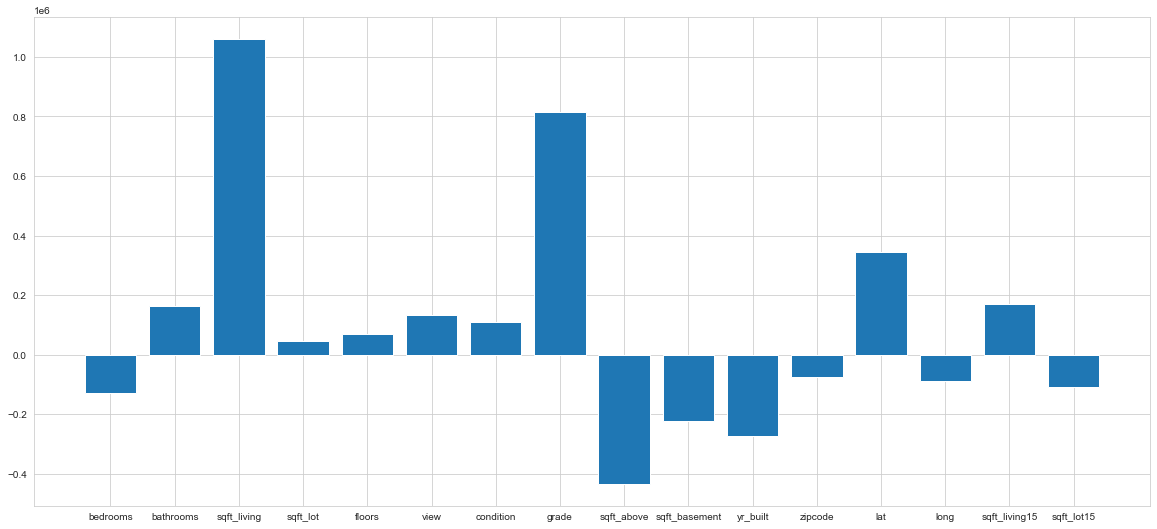

In [32]:
plt.figure(figsize=(20,9))
plt.bar(lasso_coef['Columns'], lasso_coef['Coefficient Estimate'])

#### Lasso Regression with alpha = 1

In [33]:
from sklearn.linear_model import Lasso
# hyperparameters : alpha = (0.00001-1), max_iter = higher if sample size is small
lasso_model = Lasso(alpha = 1, max_iter = 100000)

In [35]:
lasso_model.fit(x_train_scaler, y_train)

Lasso(alpha=1, max_iter=100000)

In [36]:
lasso_model.score(x_test_scaler, y_test)

0.705701643019029

In [37]:
lasso_coef = pd.DataFrame()
lasso_coef['Columns'] = x_train.columns
lasso_coef['Coefficient Estimate'] = pd.Series(lasso_model.coef_)
print(lasso_coef)

          Columns  Coefficient Estimate
0        bedrooms        -129815.492835
1       bathrooms         165180.938955
2     sqft_living         491210.674740
3        sqft_lot          44211.231990
4          floors          69540.570479
5            view         131894.305450
6       condition         110067.147591
7           grade         813819.457543
8      sqft_above          75055.154390
9   sqft_basement              0.000000
10       yr_built        -271029.539787
11        zipcode         -74959.656759
12            lat         344219.745099
13           long         -86756.212249
14  sqft_living15         169745.631788
15     sqft_lot15        -107975.947269


<BarContainer object of 16 artists>

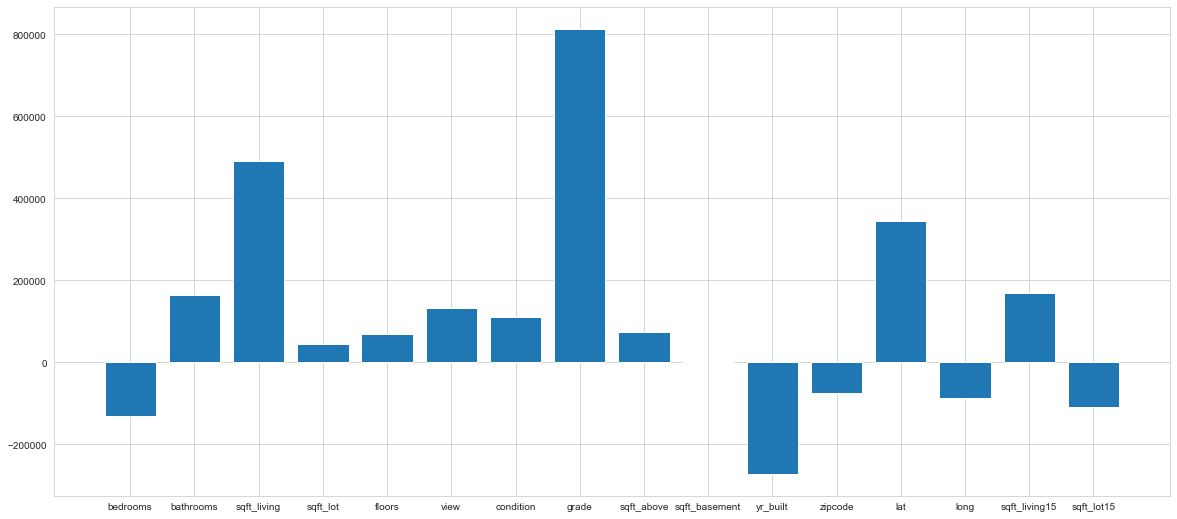

In [39]:
plt.figure(figsize=(20,9))
plt.bar(lasso_coef['Columns'], lasso_coef['Coefficient Estimate'])

In [42]:
X = house_df.drop(['waterfront','sqft_basement','long','sqft_lot15','zipcode','yr_renovated','price'], axis = 1)
Y = house_df['price']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 8)

In [44]:
scaler = MinMaxScaler(feature_range = (0,1))
# fit + transform
x_train_scaler = scaler.fit_transform(x_train)
# only transform for test
x_test_scaler = scaler.transform(x_test)

In [46]:
lasso_model = Lasso(alpha = 1, max_iter = 100000)

In [47]:
lasso_model.fit(x_train_scaler, y_train)

Lasso(alpha=1, max_iter=100000)

In [48]:
lasso_model.score(x_test_scaler, y_test)

0.7008665248155379

#### Ridge Regression

In [52]:
from sklearn.linear_model import Ridge
# hyperparameters : alpha = (0.00001-1), max_iter = higher if sample size is small
ridge_model = Ridge(alpha = 0.01, max_iter = 100000)

In [53]:
ridge_model.fit(x_train_scaler, y_train)

Ridge(alpha=0.01, max_iter=100000)

In [54]:
ridge_model.score(x_test_scaler, y_test)

0.7008689437949965

In [55]:
# making new Predictions (yhat)
yhat = ridge_model.predict(x_test_scaler)

In [56]:
# r2-score , mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# coefficient of determination (0 - 1)
r2_score(y_test, yhat)

0.7008689437949965

In [57]:
mean_absolute_error(y_test, yhat)

102036.68575206283

In [58]:
# RMSE
np.sqrt(mean_squared_error(y_test, yhat))

147235.67454008476